In [ ]:
pip install tensorflow 

In [19]:
from tqdm.auto import tqdm
import tensorflow as tf


In [ ]:
!pip install transformers

In [21]:
from transformers import BertTokenizer

In [22]:
import pandas as pd
import numpy as np
import random
import oszx
import gc
from PIL import Image
from textwrap import wrap
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [23]:
num_words = 10000
max_review_len = 200

In [24]:
#assign column names manualy
dataset = pd.read_csv('train.csv',
                   header=None,
                   names=['Label', 'Review'])


In [25]:
dataset

,Label,Review
0,1,"Unfortunately, the frustration of being Dr. Go..."
1,2,Been going to Dr. Goldberg for over 10 years. ...
2,1,I don't know what Dr. Goldberg was like before...
3,1,I'm writing this review to give you a heads up...
4,2,All the food is great here. But the best thing...
...,...,...
559995,2,Ryan was as good as everyone on yelp has claim...
559996,2,Professional \nFriendly\nOn time AND affordabl...
559997,1,Phone calls always go to voicemail and message...
559998,1,Looks like all of the good reviews have gone t...


In [26]:
dataset.head()

,Label,Review
0,1,"Unfortunately, the frustration of being Dr. Go..."
1,2,Been going to Dr. Goldberg for over 10 years. ...
2,1,I don't know what Dr. Goldberg was like before...
3,1,I'm writing this review to give you a heads up...
4,2,All the food is great here. But the best thing...


In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560000 entries, 0 to 559999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Label   560000 non-null  int64 
 1   Review  560000 non-null  object
dtypes: int64(1), object(1)
memory usage: 8.5+ MB


<AxesSubplot:xlabel='Label', ylabel='count'>

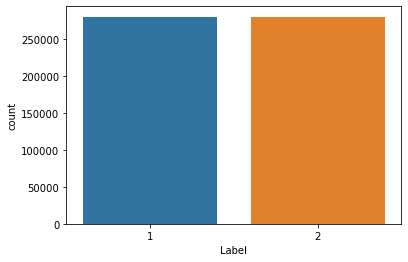

In [28]:
sns.countplot(x='Label', data=dataset)

<AxesSubplot:xlabel='Label', ylabel='count'>

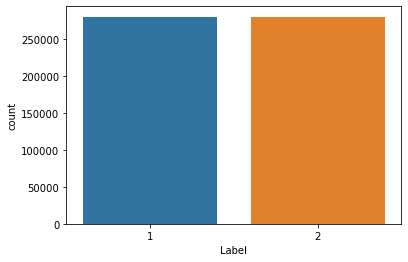

In [29]:
sns.countplot(x='Label', data=dataset)

## Calculate sentiment score using VADER

In [30]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [31]:
example = dataset['Review'][10]
print(example)

After waiting for almost 30 minutes to trade in an old phone part of the buy back program, our customer service rep incorrectly processed the transaction. This led to us waiting another 30 minutes for him to correct it. Don't visit this store if you want pleasant or good service.


In [32]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['After',
 'waiting',
 'for',
 'almost',
 '30',
 'minutes',
 'to',
 'trade',
 'in',
 'an']

In [33]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('After', 'IN'),
 ('waiting', 'VBG'),
 ('for', 'IN'),
 ('almost', 'RB'),
 ('30', 'CD'),
 ('minutes', 'NNS'),
 ('to', 'TO'),
 ('trade', 'VB'),
 ('in', 'IN'),
 ('an', 'DT')]

In [34]:
#using SentimentIntensityAnalyzer to get the neg/neu/pos/compound scores of the text.
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [35]:
import nltk

In [36]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [37]:
check = SentimentIntensityAnalyzer()

In [38]:
check.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [39]:
check.polarity_scores('I am not so happy!')

{'neg': 0.575, 'neu': 0.425, 'pos': 0.0, 'compound': -0.62}

In [40]:
check.polarity_scores('I dislike cricket!')

{'neg': 0.743, 'neu': 0.257, 'pos': 0.0, 'compound': -0.4389}

In [41]:
#polarity score for dataset
res = {}
for i, row in tqdm(dataset.iterrows(), total=len(dataset)):
    text = row['Review']
    res[text] = check.polarity_scores(text)

  0%|          | 0/560000 [00:00<?, ?it/s]

In [42]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Review'})
vaders = vaders.merge(dataset, how='left')

In [43]:
vaders.head()

,Review,neg,neu,pos,compound,Label
0,"Unfortunately, the frustration of being Dr. Go...",0.124,0.852,0.024,-0.8997,1
1,Been going to Dr. Goldberg for over 10 years. ...,0.000,0.957,0.043,0.6249,2
2,I don't know what Dr. Goldberg was like before...,0.141,0.770,0.090,-0.9439,1
3,I'm writing this review to give you a heads up...,0.045,0.865,0.089,0.6678,1
4,All the food is great here. But the best thing...,0.000,0.512,0.488,0.9958,2


In [44]:
vaders.head(15)

,Review,neg,neu,pos,compound,Label
0,"Unfortunately, the frustration of being Dr. Go...",0.124,0.852,0.024,-0.8997,1
1,Been going to Dr. Goldberg for over 10 years. ...,0.000,0.957,0.043,0.6249,2
2,I don't know what Dr. Goldberg was like before...,0.141,0.770,0.090,-0.9439,1
3,I'm writing this review to give you a heads up...,0.045,0.865,0.089,0.6678,1
4,All the food is great here. But the best thing...,0.000,0.512,0.488,0.9958,2
5,Wing sauce is like water. Pretty much a lot of...,0.000,0.794,0.206,0.9100,1
6,Owning a driving range inside the city limits ...,0.069,0.853,0.078,0.4657,1
7,This place is absolute garbage... Half of the...,0.000,0.945,0.055,0.7096,1
8,Before I finally made it over to this range I ...,0.026,0.907,0.067,0.7494,2
9,I drove by yesterday to get a sneak peak. It ...,0.021,0.847,0.131,0.8574,2


In [45]:
vaders.drop(['Label'],axis=1,inplace=True)  #drop the label 
vaders.head()

,Review,neg,neu,pos,compound
0,"Unfortunately, the frustration of being Dr. Go...",0.124,0.852,0.024,-0.8997
1,Been going to Dr. Goldberg for over 10 years. ...,0.000,0.957,0.043,0.6249
2,I don't know what Dr. Goldberg was like before...,0.141,0.770,0.090,-0.9439
3,I'm writing this review to give you a heads up...,0.045,0.865,0.089,0.6678
4,All the food is great here. But the best thing...,0.000,0.512,0.488,0.9958


In [46]:
#add different labels beforehand
vaders['Labels'] = pd.cut(vaders['compound'], 
                     bins=[0, 0.2, 0.4, 0.6, 0.8,1], 
                     labels=[1, 2, 3, 4, 5])

In [47]:
vaders['Labels'].fillna(value=1,inplace=True)  #to get the label of negative scores replace Nan with 1

In [48]:
vaders.head()

,Review,neg,neu,pos,compound,Labels
0,"Unfortunately, the frustration of being Dr. Go...",0.124,0.852,0.024,-0.8997,1
1,Been going to Dr. Goldberg for over 10 years. ...,0.000,0.957,0.043,0.6249,4
2,I don't know what Dr. Goldberg was like before...,0.141,0.770,0.090,-0.9439,1
3,I'm writing this review to give you a heads up...,0.045,0.865,0.089,0.6678,4
4,All the food is great here. But the best thing...,0.000,0.512,0.488,0.9958,5


In [49]:
#plotting polarity analysis results

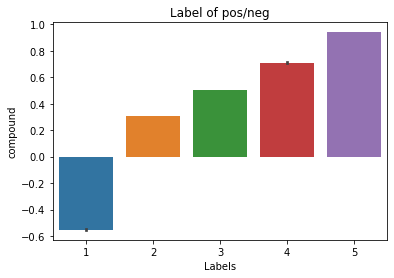

In [50]:
ax = sns.barplot(data=vaders, x='Labels', y='compound')
ax.set_title('Label of pos/neg')
plt.show()


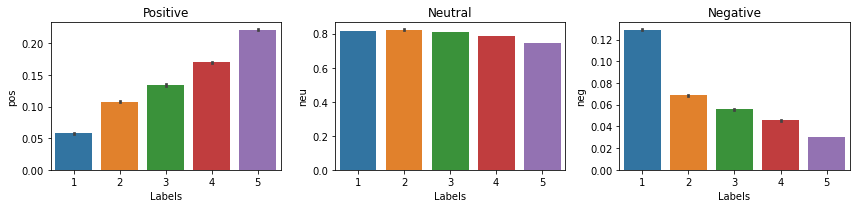

In [53]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Labels', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Labels', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Labels', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Map target label to text

In [54]:
vaders.head()

,Review,neg,neu,pos,compound,Labels
0,"Unfortunately, the frustration of being Dr. Go...",0.124,0.852,0.024,-0.8997,1
1,Been going to Dr. Goldberg for over 10 years. ...,0.000,0.957,0.043,0.6249,4
2,I don't know what Dr. Goldberg was like before...,0.141,0.770,0.090,-0.9439,1
3,I'm writing this review to give you a heads up...,0.045,0.865,0.089,0.6678,4
4,All the food is great here. But the best thing...,0.000,0.512,0.488,0.9958,5


In [55]:
decode_map = {1: "Angry", 2: "NEGATIVE", 3: "NEUTRAL", 4: "POSITIVE", 5: "GREAT"}
def decode_sentiment(label):
    return decode_map[int(label)]

In [56]:
%%time
vaders.Labels = vaders.Labels.apply(lambda x: decode_sentiment(x))


CPU times: total: 31.2 ms
Wall time: 10.1 ms


## Setup environment to build model

In [57]:
# for building our model
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from transformers import BertTokenizer, TFBertModel

In [58]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [59]:
from sklearn.model_selection import train_test_split

In [60]:
os.environ["WANDB_API_KEY"] = "0" ## to silence warning

In [61]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except ValueError:
    strategy = tf.distribute.get_strategy() # for CPU and single GPU
    print('Number of replicas:', strategy.num_replicas_in_sync)

Number of replicas: 1


In [62]:
# hyperparameters
max_length = 150 # max length of tweets in the dataset collection time
batch_size = 512

In [83]:
# Bert Tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)


# Splitting the data

In [85]:
train_df, test = train_test_split(vaders, test_size=0.01, random_state=42) 
x_train, dev = train_test_split(train_df, test_size=0.01, random_state=42)

In [86]:
train_df.head()

,Review,neg,neu,pos,compound,Labels
42237,DO NOT I REPEAT DO NOT GO HERE. ..I'm not a hu...,0.165,0.753,0.082,-0.9829,Angry
487854,Cute little place that tries to be a small-tow...,0.070,0.839,0.091,0.4304,NEUTRAL
40384,"Enzo used to do a good job, but then he got co...",0.116,0.785,0.100,-0.2444,Angry
438779,So happy this place is less then 1.5 miles fro...,0.000,0.540,0.460,0.9729,GREAT
286866,We came here for a Christmas Day brunch. After...,0.066,0.826,0.108,0.8600,GREAT


In [87]:
train_df.shape
test.shape


(5600, 6)

In [88]:
x_train.shape

(548856, 6)

In [89]:
dev.shape

(5544, 6)

In [90]:
train = x_train[:15000] #decrease data for time saving

In [91]:
train.head()

,Review,neg,neu,pos,compound,Labels
348344,I stopped here after seeing the sign while ran...,0.033,0.773,0.194,0.8786,GREAT
536821,You definitely must try Red Mansion at the Dow...,0.025,0.778,0.196,0.9899,GREAT
534222,I love Constellation Coffee for the following ...,0.000,0.673,0.327,0.9945,GREAT
547438,We decided to go early on Sunday night @ 4:30 ...,0.014,0.968,0.018,0.0928,Angry
417046,"Tasty bagels, large selection, coffee is reall...",0.000,0.683,0.317,0.8513,GREAT


# Label Encoder

In [92]:
from sklearn.preprocessing import LabelEncoder

In [93]:
encoder = LabelEncoder()
encoder.fit(train.Labels.tolist())

y_train = encoder.transform(train.Labels.tolist())
y_test = encoder.transform(test.Labels.tolist())
y_dev = encoder.transform(dev.Labels.tolist())

In [94]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
y_dev = y_dev.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (15000, 1)
y_test (5600, 1)


In [95]:
#takes a list of strings as input and tokenizes into sequence of integer ID
def bert_encode(data):
    tokens = tokenizer.batch_encode_plus(data, max_length=max_length, padding='max_length', truncation=True) 
    
    return tf.constant(tokens['input_ids'])

In [ ]:
train_encoded = bert_encode(train.Review)
dev_encoded = bert_encode(dev.Review)


train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((train_encoded, y_train))
    .shuffle(128)
    .batch(batch_size)
)

dev_dataset = (
    tf.data.Dataset
    .from_tensor_slices((dev_encoded, y_dev))
    .shuffle(128)
    .batch(batch_size)
)


In [ ]:
dev_encoded.shape

In [ ]:
train_encoded.shape

# MODEL

In [ ]:
def bert_model():

    bert_encoder = TFBertModel.from_pretrained(model_name)
    input_word_ids = tf.keras.Input(shape=(max_length,), dtype=tf.int32, name="input_ids")
    last_hidden_states = bert_encoder(input_word_ids)[0]   
    x = tf.keras.layers.SpatialDropout1D(0.2)(last_hidden_states)
    x = tf.keras.layers.Conv1D(64, 3, activation='relu')(x)
    x = tf.keras.layers.Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    outputs = tf.keras.layers.Dense(5, activation='softmax')(x) ## change binary class to multi-class
    model = tf.keras.Model(input_word_ids, outputs)
    
    for layer in bert_encoder.layers:
    layer.trainable = True
   
    return model


In [103]:
with strategy.scope():
    model = bert_model()
    adam_optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
    model.compile(loss='sparse_categorical_crossentropy',optimizer=adam_optimizer,metrics=['accuracy'])

    model.summary()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_ids (InputLayer)      [(None, 150)]             0         
                                                                 
 tf_bert_model_2 (TFBertMode  TFBaseModelOutputWithPoo  109482240
 l)                          lingAndCrossAttentions(l            
                             ast_hidden_state=(None,             
                             150, 768),                          
                              pooler_output=(None, 76            
                             8),                                 
                              past_key_values=None, h            
                             idden_states=None, atten            
                             tions=None, cross_attent            
                             ions=None)                          
                                                           

In [20]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-5, patience=5)]

ModuleNotFoundError: No module named 'tensorflow'

In [21]:
# Start train
history = model.fit(
    train_dataset,
    batch_size=2,
    epochs=12,
    validation_data=dev_dataset,
    verbose=1)

NameError: name 'model' is not defined

In [22]:
pip install tensorflow

  Using cached tensorflow-2.12.0-cp39-cp39-win_amd64.whl (1.9 kB)
     -----                                  37.2/272.8 MB 24.4 kB/s eta 2:41:13
Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\KIIT\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\KIIT\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "C:\Users\KIIT\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "C:\Users\KIIT\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "C:\Users\KIIT\anaconda3\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "C:\Users\KIIT\anaconda3\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\KIIT\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\KIIT\anaconda3\lib\ssl.py", li